In [2]:
import pickle

# Load the pickle file
file_path = r'D:\AytekinKarstenAI\BiomedicalImageProcessingToPopulateDictionaries\image_info_exp4_all_results.pickle'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Analyze the loaded data
# Depending on the content and structure of your pickle file, you might need to explore its keys, values, or attributes.
# For example, you might try printing the keys of the loaded dictionary:
if isinstance(data, dict):
    print("Keys in the pickle file:", data.keys())
else:
    print("Loaded data is not a dictionary.")

Keys in the pickle file: dict_keys(['A1-', 'A2-', 'A3-', 'A4-', 'A5-', 'A6-', 'A7-', 'A8-', 'A9-', 'A10-', 'A11-', 'A12-', 'B1-', 'B2-', 'B3-', 'B4-', 'B5-', 'B6-', 'B7-', 'B8-', 'B9-', 'B10-', 'B11-', 'B12-', 'C1-', 'C2-', 'C3-', 'C4-', 'C5-', 'C6-', 'C7-', 'C8-', 'C9-', 'C10-', 'C11-', 'C12-', 'D1-', 'D2-', 'D3-', 'D4-', 'D5-', 'D6-', 'D7-', 'D8-', 'D9-', 'D10-', 'D11-', 'D12-', 'E1-', 'E2-', 'E3-', 'E4-', 'E5-', 'E6-', 'E7-', 'E8-', 'E9-', 'E10-', 'E11-', 'E12-', 'F1-', 'F2-', 'F3-', 'F4-', 'F5-', 'F6-', 'F7-', 'F8-', 'F9-', 'F10-', 'F11-', 'F12-', 'G1-', 'G2-', 'G3-', 'G4-', 'G5-', 'G6-', 'G7-', 'G8-', 'G9-', 'G10-', 'G11-', 'G12-', 'H1-', 'H2-', 'H3-', 'H4-', 'H5-', 'H6-', 'H7-', 'H8-', 'H9-', 'H10-', 'H11-', 'H12-'])


In [3]:
data_g6 = data['G6-']

In [4]:
# Printing keys that contain '940' in their names
keys_with_940 = [key for key in data_g6.keys() if '940' in key]
print(keys_with_940)

['R_01_1107_940_G6-1-green_analyzed.tif', 'R_01_1407_940_G6-1-green_analyzed.tif', 'R_01_1707_940_G6-1-green_analyzed.tif', 'R_01_2007_940_G6-1-green_analyzed.tif', 'R_01_2307_940_G6-1-green_analyzed.tif', 'R_02_0207_940_G6-1-green_analyzed.tif', 'R_02_0507_940_G6-1-green_analyzed.tif', 'R_02_0807_940_G6-1-green_analyzed.tif', 'R_02_1107_940_G6-1-green_analyzed.tif', 'R_02_1407_940_G6-1-green_analyzed.tif', 'R_02_1707_940_G6-1-green_analyzed.tif']


In [11]:
print(data_g6['R_01_1107_940_G6-1-green_analyzed.tif'][1]['centroid'])

(272.6666666666667, 2.375)


In [35]:
target_coordinates = data_g6['R_01_1107_940_G6-1-green_analyzed.tif'][1]['centroid']
tolerance = 10  # Tolerance for checking around the coordinates
dates = []
for key in keys_with_940:
    values = data_g6[key]
    for component_id, component_info in values.items():
        centroid = component_info['centroid']
        if (
            target_coordinates[0] - tolerance <= centroid[0] <= target_coordinates[0] + tolerance and
            target_coordinates[1] - tolerance <= centroid[1] <= target_coordinates[1] + tolerance
        ):
            print(f"Object found in {key} at coordinates {centroid}")
            print(f"Area: {component_info['area']}")
            print(f"Min Intensity: {component_info['min_intensity']}")
            print(f"Max Intensity: {component_info['max_intensity']}")
            print(f"Mean Intensity: {component_info['mean_intensity']}")
            dates.append(key.split('_')[1] + '_' + key.split('_')[2])

            # Remove duplicates and sort the dates
            unique_sorted_dates = sorted(set(dates))

            # Create x_for_plot_940
            x_for_plot_940 = unique_sorted_dates
            print("---")

Object found in R_01_1107_940_G6-1-green_analyzed.tif at coordinates (272.6666666666667, 2.375)
Area: 24
Min Intensity: 128
Max Intensity: 155
Mean Intensity: 135.25
---
Object found in R_01_1407_940_G6-1-green_analyzed.tif at coordinates (272.3333333333333, 1.2666666666666666)
Area: 15
Min Intensity: 98
Max Intensity: 120
Mean Intensity: 104.0
---
Object found in R_01_1707_940_G6-1-green_analyzed.tif at coordinates (269.9, 1.55)
Area: 20
Min Intensity: 91
Max Intensity: 106
Mean Intensity: 96.45
---
Object found in R_01_2007_940_G6-1-green_analyzed.tif at coordinates (268.1, 1.55)
Area: 20
Min Intensity: 77
Max Intensity: 91
Mean Intensity: 80.6
---
Object found in R_02_0207_940_G6-1-green_analyzed.tif at coordinates (265.3636363636364, 2.1363636363636362)
Area: 22
Min Intensity: 59
Max Intensity: 72
Mean Intensity: 63.13636363636363
---
Object found in R_02_0507_940_G6-1-green_analyzed.tif at coordinates (264.0, 1.3333333333333333)
Area: 18
Min Intensity: 58
Max Intensity: 69
Mean In

In [36]:
# Extract dates from the keys where objects are found


print(x_for_plot_940)

['01_1107', '01_1407', '01_1707', '01_2007', '02_0207', '02_0507', '02_0807', '02_1107', '02_1707']


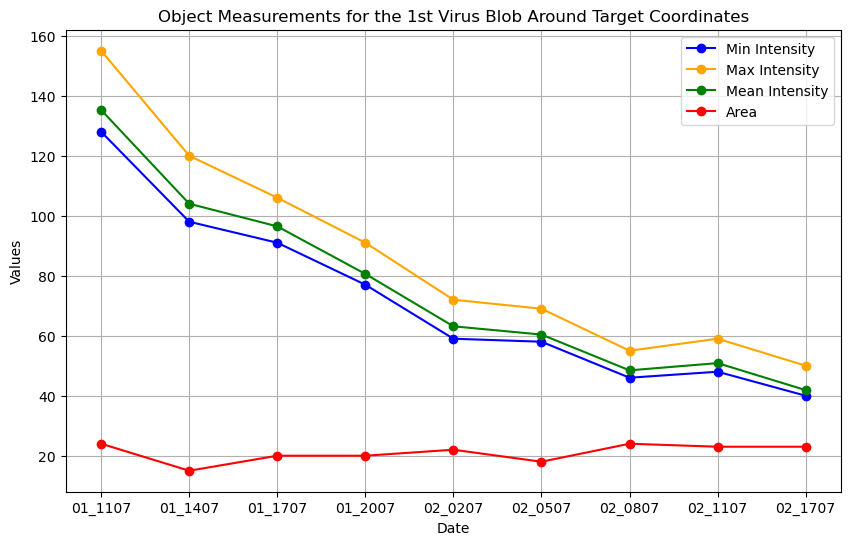

In [38]:
import matplotlib.pyplot as plt


target_coordinates = data_g6['R_01_1107_940_G6-1-green_analyzed.tif'][1]['centroid']
tolerance = 10  # Tolerance for checking around the coordinates

# Initialize lists to store values for each measurement
min_intensity_values = []
max_intensity_values = []
mean_intensity_values = []
area_values = []

for key in keys_with_940:
    values = data_g6[key]
    for component_id, component_info in values.items():
        centroid = component_info['centroid']
        if (
            target_coordinates[0] - tolerance <= centroid[0] <= target_coordinates[0] + tolerance and
            target_coordinates[1] - tolerance <= centroid[1] <= target_coordinates[1] + tolerance
        ):
            # Append values for each measurement
            min_intensity_values.append(component_info['min_intensity'])
            max_intensity_values.append(component_info['max_intensity'])
            mean_intensity_values.append(component_info['mean_intensity'])
            area_values.append(component_info['area'])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(x_for_plot_940, min_intensity_values, marker='o', color='blue', label='Min Intensity')
plt.plot(x_for_plot_940, max_intensity_values, marker='o', color='orange', label='Max Intensity')
plt.plot(x_for_plot_940, mean_intensity_values, marker='o', color='green', label='Mean Intensity')
plt.plot(x_for_plot_940, area_values, marker='o', color='red', label='Area')

plt.title('Object Measurements for the 1st Virus Blob Around Target Coordinates')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.savefig('object_measurements_plot.png')

plt.show()